In [37]:
#needed function and libraries importing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report



In [19]:
# Loading data CSV and display first 5 rows
df = pd.read_csv('ecommerce_returns_synthetic_data.csv')
print("First 5 rows of the dataset:")
print(df.head().to_string())
print(f"✅ Data loaded with {df.shape[0]} rows and {df.shape[1]} columns\n")

First 5 rows of the dataset:
      Order_ID    Product_ID       User_ID  Order_Date Return_Date Product_Category  Product_Price  Order_Quantity Return_Reason Return_Status  Days_to_Return  User_Age User_Gender User_Location Payment_Method Shipping_Method  Discount_Applied
0  ORD00000000  PROD00000000  USER00000000  2023-08-05  2024-08-26         Clothing         411.59               3  Changed mind      Returned           387.0        58        Male        City54     Debit Card        Next-Day             45.27
1  ORD00000001  PROD00000001  USER00000001  2023-10-09  2023-11-09            Books         288.88               3    Wrong item      Returned            31.0        68      Female        City85    Credit Card         Express             47.79
2  ORD00000002  PROD00000002  USER00000002  2023-05-06         NaN             Toys         390.03               5           NaN  Not Returned             NaN        22      Female        City30     Debit Card        Next-Day             2

In [23]:
#  Cleaning Data droping duplicates
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(subset=['Order_Date', 'Product_Price', 'Return_Status'], inplace=True)
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Return_Date'] = pd.to_datetime(df['Return_Date'], errors='coerce')
df['Days_to_Return'] = (df['Return_Date'] - df['Order_Date']).dt.days
df['Days_to_Return'] = df['Days_to_Return'].fillna(-1)  # -1 = Not returned
df['Is_Returned'] = df['Return_Status'].apply(lambda x: 1 if x == 'Returned' else 0)
print(f" Removed {initial_rows - df.shape[0]} duplicate rows")
print("Processed date columns and created Days_to_Return & Is_Returned features\n")


 Removed 0 duplicate rows
Processed date columns and created Days_to_Return & Is_Returned features



In [25]:
#  Clean Categorical Columns
cat_cols = ['Product_Category', 'User_Gender', 'User_Location', 'Payment_Method', 'Shipping_Method']
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.title()
    print("✅ Standardized text in categorical columns\n")

✅ Standardized text in categorical columns

✅ Standardized text in categorical columns

✅ Standardized text in categorical columns

✅ Standardized text in categorical columns

✅ Standardized text in categorical columns



In [28]:
# Features
df['High_Discount'] = (df['Discount_Applied'] > 30).astype(int)
df['Is_Expensive'] = (df['Product_Price'] > df['Product_Price'].median()).astype(int)
print(" Created 'High_Discount' and 'Is_Expensive' features")
print(df[['High_Discount', 'Is_Expensive']].head(3), "\n")

 Created 'High_Discount' and 'Is_Expensive' features
   High_Discount  Is_Expensive
0              1             1
1              1             1
2              0             1 



In [27]:
# Selecting Features
features = [
    'Product_Category', 'Product_Price', 'Order_Quantity', 'User_Age',
    'User_Gender', 'User_Location', 'Payment_Method', 'Shipping_Method',
    'Discount_Applied', 'Days_to_Return', 'High_Discount', 'Is_Expensive'
]
X = df[features]
y = df['Is_Returned']
print(f"✅ Selected {len(features)} features for modeling\n")

✅ Selected 12 features for modeling



In [29]:
#  Preprocessing Pipeline
categorical = ['Product_Category', 'User_Gender', 'User_Location', 'Payment_Method', 'Shipping_Method']
numerical = ['Product_Price', 'Order_Quantity', 'User_Age', 'Discount_Applied', 'Days_to_Return']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('num', StandardScaler(), numerical)
], remainder='passthrough')

pipeline = Pipeline([
    ('prep', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000))
])
print("✅ Pipeline ready (OneHotEncoder + StandardScaler + LogisticRegression)\n")

✅ Pipeline ready (OneHotEncoder + StandardScaler + LogisticRegression)



In [31]:
#  Train/Test Splited and Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape[0]} rows |  Test set: {X_test.shape[0]} rows")

pipeline.fit(X_train, y_train)
print("✅ Model training complete\n")

Training set: 8000 rows |  Test set: 2000 rows
✅ Model training complete



In [32]:
#  Evaluation Reporting
y_pred = pipeline.predict(X_test)
print(" Classification Report:")
print(classification_report(y_test, y_pred))

 Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.45      0.47      1009
           1       0.49      0.54      0.51       991

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



In [33]:
#  Predict Return Probability
df['Return_Probability'] = pipeline.predict_proba(X)[:, 1]
print(df[['Return_Probability']].head(5), "\n")

   Return_Probability
0            0.590415
1            0.564472
2            0.550167
3            0.555589
4            0.502502 



In [34]:
# Identify high-risk products
high_risk = df[df['Return_Probability'] > 0.75]
print(f" Identified {len(high_risk)} high-risk products with Return_Probability > 0.75\n")

 Identified 0 high-risk products with Return_Probability > 0.75



 Return Rate by Product Category


C:\Users\DELL\AppData\Local\Temp\ipykernel_14028\1360588676.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_return.index, y=category_return.values, palette="coolwarm")


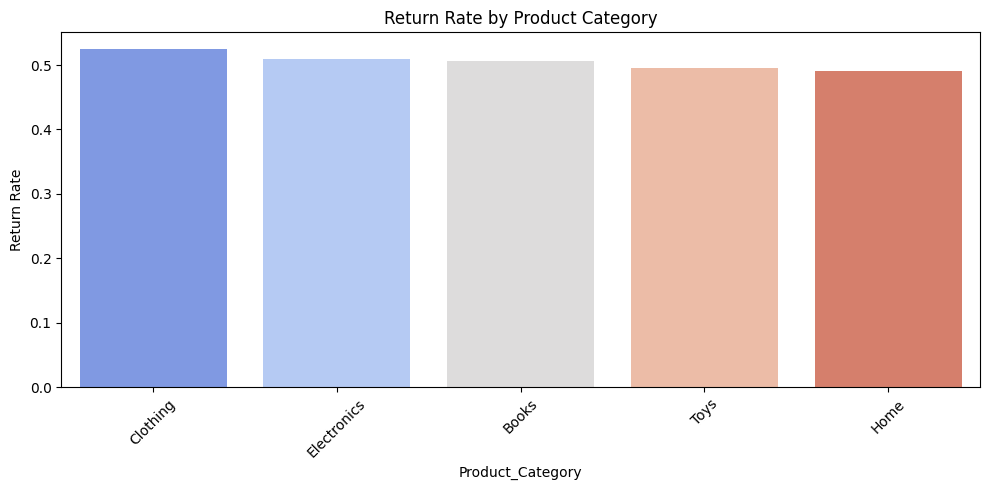

In [39]:
# S Visual - Return Rate by Category
print(" Return Rate by Product Category")
category_return = df.groupby('Product_Category')['Is_Returned'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=category_return.index, y=category_return.values, palette="coolwarm")
plt.title("Return Rate by Product Category")
plt.xticks(rotation=45)
plt.ylabel("Return Rate")
plt.tight_layout()
plt.show()

 Return Rate by Top User Locations


C:\Users\DELL\AppData\Local\Temp\ipykernel_14028\682075777.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette="crest")


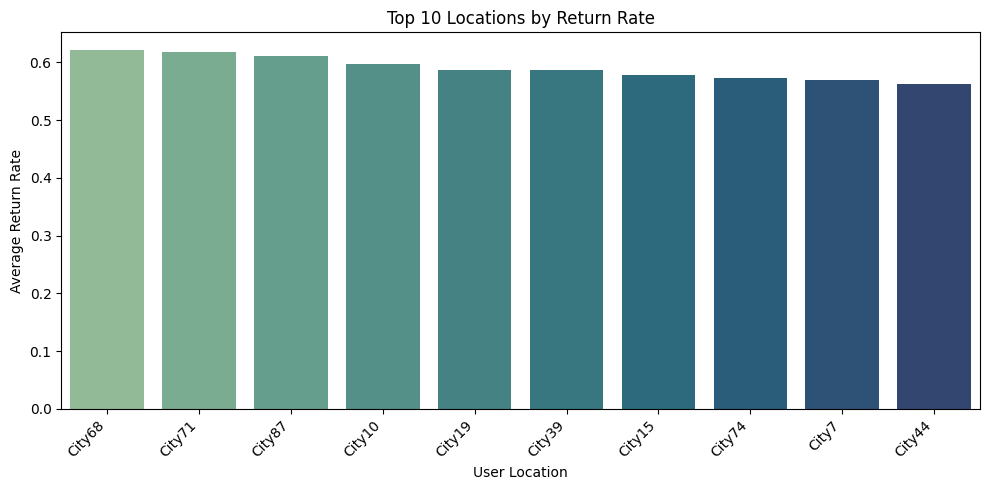

In [42]:
# Visual - Return Rate by Top User Locations
print(" Return Rate by Top User Locations")

# Clean and title case location column
df['User_Location'] = df['User_Location'].astype(str).str.strip().str.title()

# Get top 10 locations by highest return rate
location_return = df.groupby('User_Location')['Is_Returned'].mean().sort_values(ascending=False)
top_locations = location_return.head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_locations.index, y=top_locations.values, palette="crest")
plt.title("Top 10 Locations by Return Rate")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Return Rate")
plt.xlabel("User Location")
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_14028\3685302201.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AbsImportance', y='Feature', data=top_features, palette="magma")


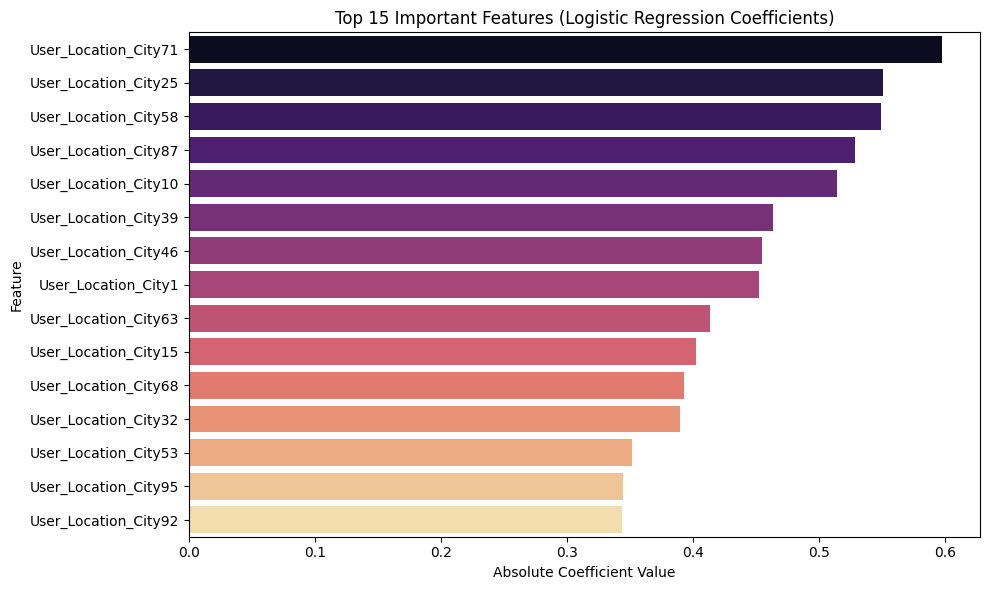

In [45]:
# S- Feature Importance (Top 15 Coefficients)
# Extract logistic regression and encoder
model = pipeline.named_steps['logreg']
ohe = pipeline.named_steps['prep'].named_transformers_['cat']
feature_names_cat = ohe.get_feature_names_out(categorical)
final_feature_names = list(feature_names_cat) + numerical + ['High_Discount', 'Is_Expensive']

# Create DataFrame of feature importances
coef_df = pd.DataFrame({
    'Feature': final_feature_names,
    'Importance': model.coef_[0]
})

# Take absolute value for importance and sort
coef_df['AbsImportance'] = coef_df['Importance'].abs()
top_features = coef_df.sort_values(by='AbsImportance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='AbsImportance', y='Feature', data=top_features, palette="magma")
plt.title("Top 15 Important Features (Logistic Regression Coefficients)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [46]:
#  Export Outputs
df.to_csv("cleaned_ecommerce_data.csv", index=False)
high_risk[['Order_ID', 'Product_ID', 'Product_Category', 'Return_Probability']].to_csv(
    "high_risk_products.csv", index=False
)

print("✅ Pipeline completed successfully.")
print("📁 Files saved:")
print(" - cleaned_ecommerce_data.csv")
print(" - high_risk_products.csv")

✅ Pipeline completed successfully.
📁 Files saved:
 - cleaned_ecommerce_data.csv
 - high_risk_products.csv
